In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc
from copy import deepcopy

In [158]:
df = pd.read_csv('athlete_events.csv', delimiter=',') 
# filter by sport - basketball
df = df.loc[(df['Sport'] == "Basketball")]
df = df.dropna()

In [159]:
female_players = df.loc[(df['Sex'] == "F")]
male_players = df.loc[(df['Sex'] == "M")]

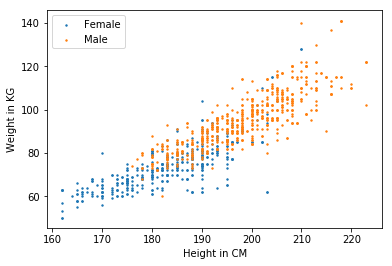

In [160]:
plt.scatter(female_players['Height'], female_players['Weight'], s=2, label='Female')
plt.scatter(male_players['Height'], male_players['Weight'], s=2, label='Male')
plt.legend()
plt.ylabel("Weight in KG")
plt.xlabel("Height in CM")
plt.show()

In [161]:
def dist(a, b, ax=1):
    # Euclidean Distance Caculator
    return np.linalg.norm(a - b, axis=ax)

In [162]:
# Number of clusters for predicting athlete gender
k = 2
f1 = df['Height'].astype(float)
f2 = df['Weight'].astype(float)
# merging two columns into np array
X = np.array(list(zip(f1, f2)))
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Sex'])
df['Sex'] = labelEncoder.transform(df['Sex'])
Y = np.array(df['Sex'])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
609,351,Julius Shareef Abdur-Rahim,1,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1029,576,"Alejandro ""lex"" Abrines Redondo",1,23.0,198.0,93.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Bronze
1035,580,Svetlana Olegovna Abrosimova,0,28.0,188.0,77.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,Bronze
1807,1000,Dainius Adomaitis,1,26.0,202.0,100.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze
1856,1020,Adriana Aparecida dos Santos,0,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


In [163]:
C_X = np.random.randint(np.min(f1), np.max(f1), size=k)
C_Y = np.random.randint(np.min(f2), np.max(f2), size=k)
C = np.array(list(zip(C_X, C_Y)), dtype=np.float32)

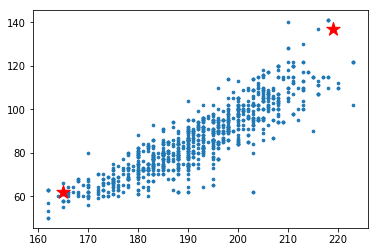

In [164]:
plt.scatter(f1, f2, s=7)
plt.scatter(C_X, C_Y, marker='*', s=200, c='r')


In [165]:
# Array for storing old values of centroids
C_old = np.zeros(C.shape)

In [166]:
clusters = np.zeros(len(X))
# Counting distance between new centroids and old centroids
error = dist(C, C_old, None)
# Looping till there is no error (no distance between C and C_old)
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        # caluclating distance between current point in array X and Centroid
        distances = dist(X[i], C)
        # returning min value index of distances array
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

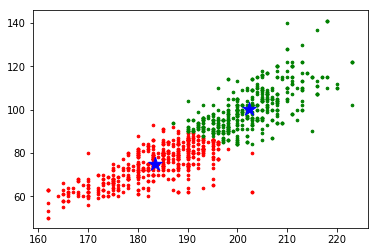

In [167]:
# Ploting clustered results
colors = ['r', 'g']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='blue')

In [168]:
# Our centroids
C

array([[183.45168,  74.95539],
       [202.28572, 100.35931]], dtype=float32)

In [169]:
# Lets compare our centroids with the ones calculated by sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k).fit(X)
labels = kmeans.predict(X)
skl_centroids = kmeans.cluster_centers_

In [170]:
skl_centroids

array([[182.90215264,  74.34050881],
       [201.8200409 ,  99.599182  ]])

In [171]:
# As we can see centroids calculted from scratch
# are more or less the same as the ones from sklearn lib.

In [173]:
# 1 - male, 0 - female
# C[0] - male, C[1] - female
correct = 0
for i in range(len(X)):
    prediction = dist(X[i], C)
    if prediction[1] > prediction[0]:
        predicted_gender = 0
    else:
        predicted_gender = 1
    if predicted_gender == Y[i]:
        correct += 1

print(correct/len(X))

0.78


In [174]:
C

array([[183.45168,  74.95539],
       [202.28572, 100.35931]], dtype=float32)

In [175]:
# Athlete gender prediction using K-Means clustering with two clusters (male, female) 
# based on athlete weight and height gives accuracy of 78%.
# This dataset has few numerical features (Height, Weight, Year, Age) that could be used for K-Means clustering,
# but it could improbe accuracy.

In [176]:
female_players.groupby(['Year']).mean().head()

,ID,Age,Height,Weight
Year,,,,
1976,76997.694444,23.416667,180.166667,73.750000
1980,69266.500000,24.388889,180.638889,73.972222
1984,71740.085714,21.628571,182.371429,72.857143
1988,66250.611111,23.055556,183.333333,71.694444
1992,72222.031250,25.250000,183.093750,72.093750


In [177]:
male_players.groupby(['Year']).mean().head()

,ID,Age,Height,Weight
Year,,,,
1936,74405.666667,24.533333,188.000000,81.066667
1948,49905.863636,24.181818,188.681818,85.181818
1952,64679.058824,22.705882,191.941176,86.352941
1956,65965.565217,23.260870,191.347826,89.782609
1960,74345.656250,23.343750,193.781250,88.718750


In [178]:
train = df[['Year', 'Age', 'Height', 'Weight']]

In [179]:
X1 = np.array(train.astype(float))

In [180]:
kmeans_4_features = KMeans(n_clusters=k).fit(X1)
labels = kmeans_4_features.predict(X1)
skl_centroids_4 = kmeans_4_features.cluster_centers_
skl_centroids_4

array([[1998.31622177,   25.96714579,  184.65092402,   76.05749487],
       [1978.70565302,   24.66081871,  199.2748538 ,   96.78752437]])

In [181]:
for i in range(len(X1)):
    prediction = dist(X1[i], kmeans_4_features.cluster_centers_)
    if prediction[0] > prediction[1]:
        predicted_gender = 0
    else:
        predicted_gender = 1
    if predicted_gender == Y[i]:
        correct += 1

print(correct/len(X1))

0.919


In [101]:
# Adding 2 more features (Year and Age) improved accuracy from 72% to 91.9%.